In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns 

In [3]:
data1=pd.read_csv("./data/yfinance_data/AAPL_historical_data.csv")
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0


In [43]:
data_news=pd.read_csv("./data/raw_analyst_ratings.csv")
data_news.head()

,Unnamed: 0,headline,url,publisher,date,stock
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A


In [45]:
data_news["Date"]=pd.to_datetime(data_news["date"], errors="coerce")


In [6]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\david\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [47]:
SIA=SentimentIntensityAnalyzer()
data_news['sentiment'] = data_news['headline'].apply(lambda x: SIA.polarity_scores(text=x)['compound'])

In [8]:
data_news.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.000
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.000
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.000
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.000
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.296


In [48]:
data_news["sentiment_cata"]=pd.cut(data_news["sentiment"], bins=[ -1,-0.25,0.25,1], labels=[ "negative", "nutral","postive"])

In [11]:
data_news.head()

,Unnamed: 0,headline,url,publisher,date,stock,sentiment,sentiment_cata
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,0.000,nutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,0.000,nutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,0.000,nutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,0.000,nutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,0.296,postive


In [12]:
data_news.dtypes

Unnamed: 0                            int64
headline                             object
url                                  object
publisher                            object
date              datetime64[ns, UTC-04:00]
stock                                object
sentiment                           float64
sentiment_cata                     category
dtype: object

In [16]:
data1.dtypes

Date                    object
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Dividends              float64
Stock Splits           float64
Data            datetime64[ns]
dtype: object

In [27]:
data1["Date_format"]=pd.to_datetime(data1["Date"],errors="coerce")

In [15]:
data1.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Data
0,1980-12-12,0.128348,0.128906,0.128348,0.128348,0.098943,469033600,0.0,0.0,1980-12-12
1,1980-12-15,0.122210,0.122210,0.121652,0.121652,0.093781,175884800,0.0,0.0,1980-12-15
2,1980-12-16,0.113281,0.113281,0.112723,0.112723,0.086898,105728000,0.0,0.0,1980-12-16
3,1980-12-17,0.115513,0.116071,0.115513,0.115513,0.089049,86441600,0.0,0.0,1980-12-17
4,1980-12-18,0.118862,0.119420,0.118862,0.118862,0.091630,73449600,0.0,0.0,1980-12-18


In [51]:
data_news["Date"]=data_news["Date"].dt.date
data_news.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.000,nutral
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.000,nutral
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.000,nutral
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.000,nutral
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,0.296,postive


In [87]:
data_news['sentiment_Average'] = data_news.groupby('Date')['sentiment'].transform('mean')
data_news.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.000,nutral,0.498827
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.000,nutral,0.411173
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.000,nutral,0.414618
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.000,nutral,0.032172
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,0.296,postive,0.032172


In [54]:
data_news["Date"]=pd.to_datetime(data_news["Date"])

In [23]:
data_news = data_news.drop_duplicates(subset=['Date'])
data1 = data1.drop_duplicates(subset=['Date'])

In [50]:
print(data_news.dtypes)
print(data1.dtypes)


Unnamed: 0                            int64
headline                             object
url                                  object
publisher                            object
date                                 object
stock                                object
Date              datetime64[ns, UTC-04:00]
sentiment                           float64
sentiment_cata                     category
dtype: object
Date            datetime64[ns]
Open                   float64
High                   float64
Low                    float64
Close                  float64
Adj Close              float64
Volume                   int64
Dividends              float64
Stock Splits           float64
Data            datetime64[ns]
Date_format     datetime64[ns]
dtype: object


In [71]:
# Include 'Date' explicitly in the subset
data_AAPL = data_news.merge(
    data1[["Date", "Open", "High", "Low", "Close", "Adj Close", "Volume", "Dividends", "Stock Splits"]],
    on="Date"
)


In [60]:
# Include 'Date' explicitly in the subset
AAPL = data1.merge(
    data_news[["Date", "headline", "url", "publisher", "date", "stock", "sentiment", "sentiment_cata", ]],
    on="Date"
)


In [61]:
AAPL.shape

(55230, 18)

In [56]:
data_AAPL.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.000,nutral,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.000,nutral,81.165001,81.550003,80.574997,81.279999,79.287506,104491200,0.0,0.0
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.000,nutral,80.875000,81.059998,79.125000,79.182503,77.241432,125522000,0.0,0.0
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.000,nutral,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,0.296,postive,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0


In [57]:
data_AAPL.isnull().sum()

Unnamed: 0        0
headline          0
url               0
publisher         0
date              0
stock             0
Date              0
sentiment         0
sentiment_cata    0
Open              0
High              0
Low               0
Close             0
Adj Close         0
Volume            0
Dividends         0
Stock Splits      0
dtype: int64

In [62]:
data_AAPL.shape

(55230, 17)

In [72]:
data_AAPL.columns

Index(['Unnamed: 0', 'headline', 'url', 'publisher', 'date', 'stock', 'Date',
       'sentiment', 'sentiment_cata', 'sentiment_Average', 'Open', 'High',
       'Low', 'Close', 'Adj Close', 'Volume', 'Dividends', 'Stock Splits'],
      dtype='object')

In [59]:
data_news.shape

(1407328, 9)

In [73]:
data_AAPL["Daily_Return"]=data_AAPL["Close"].pct_change()
data_AAPL.head()

,Unnamed: 0,headline,url,publisher,date,stock,Date,sentiment,sentiment_cata,sentiment_Average,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits,Daily_Return
0,0,Stocks That Hit 52-Week Highs On Friday,https://www.benzinga.com/news/20/06/16190091/s...,Benzinga Insights,2020-06-05 10:30:54-04:00,A,2020-06-05,0.000,nutral,0.498827,80.837502,82.937500,80.807503,82.875000,80.843407,137250400,0.0,0.0,NaN
1,1,Stocks That Hit 52-Week Highs On Wednesday,https://www.benzinga.com/news/20/06/16170189/s...,Benzinga Insights,2020-06-03 10:45:20-04:00,A,2020-06-03,0.000,nutral,0.411173,81.165001,81.550003,80.574997,81.279999,79.287506,104491200,0.0,0.0,-0.019246
2,2,71 Biggest Movers From Friday,https://www.benzinga.com/news/20/05/16103463/7...,Lisa Levin,2020-05-26 04:30:07-04:00,A,2020-05-26,0.000,nutral,0.414618,80.875000,81.059998,79.125000,79.182503,77.241432,125522000,0.0,0.0,-0.025806
3,3,46 Stocks Moving In Friday's Mid-Day Session,https://www.benzinga.com/news/20/05/16095921/4...,Lisa Levin,2020-05-22 12:45:06-04:00,A,2020-05-22,0.000,nutral,0.032172,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0,0.006820
4,4,B of A Securities Maintains Neutral on Agilent...,https://www.benzinga.com/news/20/05/16095304/b...,Vick Meyer,2020-05-22 11:38:59-04:00,A,2020-05-22,0.296,postive,0.032172,78.942497,79.807503,78.837502,79.722504,77.768188,81803200,0.0,0.0,0.000000


In [74]:
data_AAPL["Daily_Return"]=data_AAPL["Daily_Return"].fillna(0)

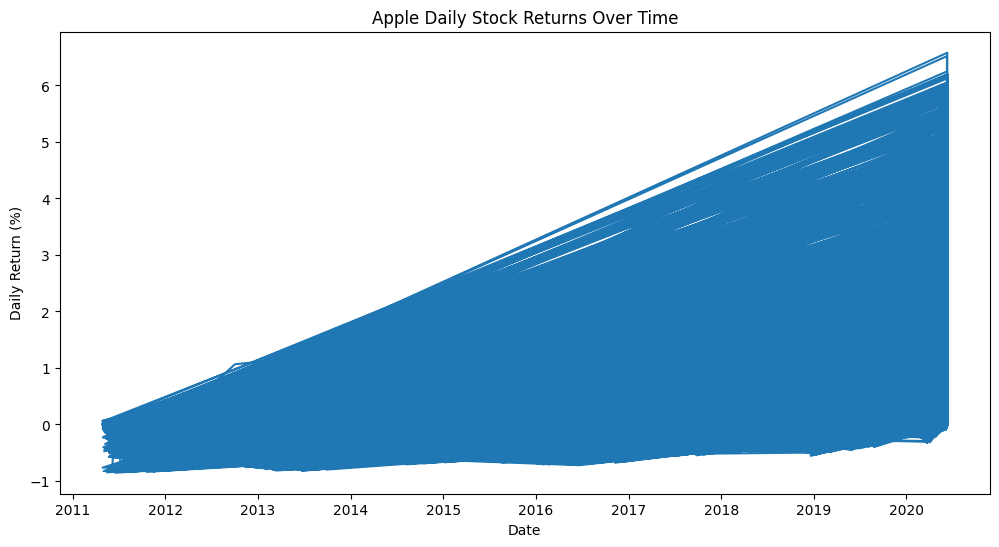

In [75]:
plt.figure(figsize=(12, 6))
plt.plot(data_AAPL['Date'], data_AAPL['Daily_Return'])
plt.title('Apple Daily Stock Returns Over Time')
plt.xlabel('Date')
plt.ylabel('Daily Return (%)')
plt.show()

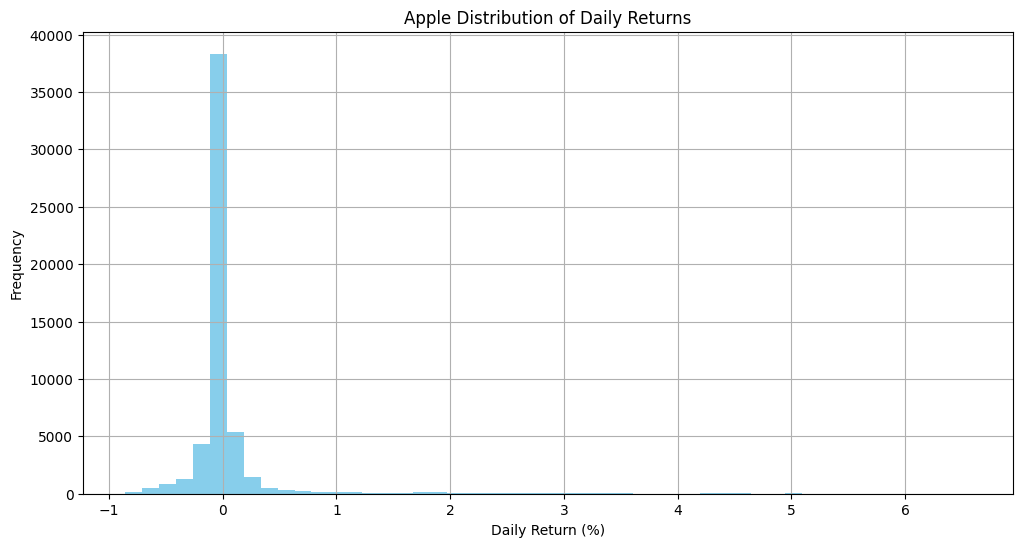

In [76]:
data_AAPL['Daily_Return'].hist(bins=50, figsize=(12, 6), color='skyblue')
plt.title('Apple Distribution of Daily Returns')
plt.xlabel('Daily Return (%)')
plt.ylabel('Frequency')
plt.show()

In [77]:
mean_return = data_AAPL['Daily_Return'].mean()
std_return = data_AAPL['Daily_Return'].std()

print(f"Apple Average Daily Return: {mean_return:.4f}")
print(f"Apple Standard Deviation of Returns: {std_return:.4f}")

Apple Average Daily Return: 0.0506
Apple Standard Deviation of Returns: 0.4799


In [88]:
correlation_avg_sent_daily_return=data_AAPL["Daily_Return"].corr(data_AAPL["sentiment_Average"],method='pearson')
print(f"Pearson Correlation: {correlation_avg_sent_daily_return}")

Pearson Correlation: 0.03892223408171163


In [81]:
correlation_sent_daily_return=data_AAPL["Daily_Return"].corr(data_AAPL["sentiment"],method='pearson')
print(correlation_sent_daily_return)

0.008991972778134917


In [80]:
correlation_avg_sent_daily_return_spearman = data_AAPL['sentiment_Average'].corr(data_AAPL['Daily_Return'], method='spearman')
print(f"Spearman Correlation: {correlation_avg_sent_daily_return_spearman}")


Spearman Correlation: -0.05195457459696336


In [82]:
correlation_sent_daily_return_spearman = data_AAPL['sentiment'].corr(data_AAPL['Daily_Return'], method='spearman')
print(f"Spearman Correlation: {correlation_sent_daily_return_spearman}")


Spearman Correlation: -0.04508153726998917


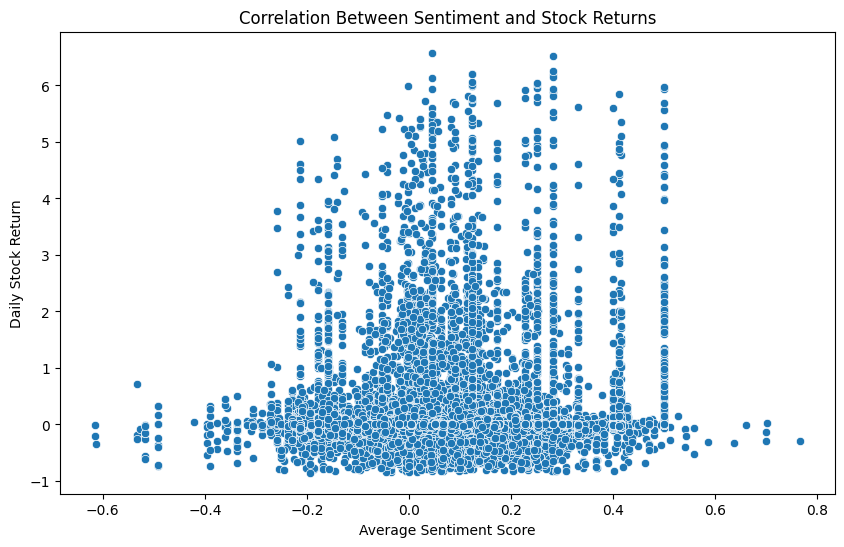

In [83]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_AAPL, x='sentiment_Average', y='Daily_Return')
plt.title('Correlation Between Sentiment and Stock Returns')
plt.xlabel('Average Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()

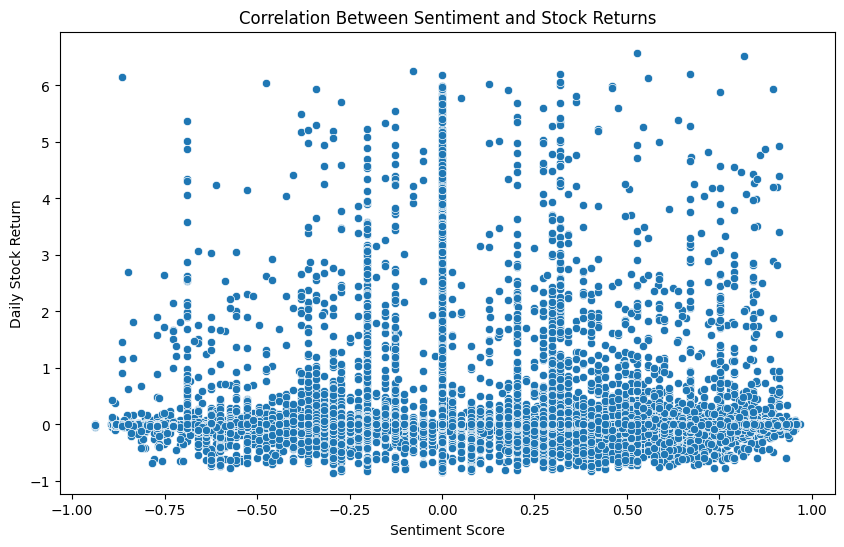

In [85]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_AAPL, x='sentiment', y='Daily_Return')
plt.title('Correlation Between Sentiment and Stock Returns')
plt.xlabel('Sentiment Score')
plt.ylabel('Daily Stock Return')
plt.show()

In [89]:
data2=pd.read_csv("./data/yfinance_data/AMZN_historical_data.csv")
data2.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Dividends,Stock Splits
0,1997-05-15,0.121875,0.125000,0.096354,0.097917,0.097917,1443120000,0.0,0.0
1,1997-05-16,0.098438,0.098958,0.085417,0.086458,0.086458,294000000,0.0,0.0
2,1997-05-19,0.088021,0.088542,0.081250,0.085417,0.085417,122136000,0.0,0.0
3,1997-05-20,0.086458,0.087500,0.081771,0.081771,0.081771,109344000,0.0,0.0
4,1997-05-21,0.081771,0.082292,0.068750,0.071354,0.071354,377064000,0.0,0.0
